In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.gridspec as grid_spec

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_68366/345286551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv(
    "/Users/dickinsonjo/repos/CollegePriceTransparency/data/InstitutionData2020-2021.csv"
)
df.head(3)

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_68366/1763566676.py:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.05-0.09,429,0.15-0.19,<=0.05,0.50-0.54,0.10-0.14,<=0.05,<=0.05,<=0.05,0.05-0.09
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,<=0.10,402,<=0.10,<=0.10,0.40-0.49,0.10-0.19,<=0.10,<=0.10,0.10-0.19,<=0.10
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


# Columns for analysis

1. UNITID
2. INSTNM
3. CITY
4. STABBR
5. ZIP
6. SCH_DEG
7. PREDDEG
8. HIGHDEG
9. CONTROL
10. REGION
11. COSTT4_A
12. TUITION_IN
13. NPT4_PUB & NPT4_PRIV
14. TUITFTE
15. INEXPFTE
16. AVGFACSAL
17. LOCALE
18. LOCALE2

In [5]:
df_cleaned = df[
    [
        "UNITID",
        "INSTNM",
        "CITY",
        "STABBR",
        "ZIP",
        "PREDDEG",
        "HIGHDEG",
        "CONTROL",
        "REGION",
        "GRAD_DEBT_MDN",
        "COSTT4_A",
        "TUITIONFEE_IN",
        "TUITIONFEE_OUT",
        "TUITFTE",
        "INEXPFTE",
        "AVGFACSAL",
        "LOCALE",
    ]
]

In [6]:
df_cleaned.isna().sum()

UNITID               0
INSTNM               0
CITY                 0
STABBR               0
ZIP                  0
PREDDEG              0
HIGHDEG              0
CONTROL              0
REGION               0
GRAD_DEBT_MDN      159
COSTT4_A          3240
TUITIONFEE_IN     2756
TUITIONFEE_OUT    2756
TUITFTE            519
INEXPFTE           519
AVGFACSAL         2643
LOCALE             497
dtype: int64

In [7]:
total = df_cleaned.shape[0]
total

6543

In [8]:
df_cleaned.isna().sum() / total * 100

UNITID             0.000000
INSTNM             0.000000
CITY               0.000000
STABBR             0.000000
ZIP                0.000000
PREDDEG            0.000000
HIGHDEG            0.000000
CONTROL            0.000000
REGION             0.000000
GRAD_DEBT_MDN      2.430078
COSTT4_A          49.518569
TUITIONFEE_IN     42.121351
TUITIONFEE_OUT    42.121351
TUITFTE            7.932141
INEXPFTE           7.932141
AVGFACSAL         40.394315
LOCALE             7.595904
dtype: float64

In [9]:
df_cleaned.query("REGION == 0")

,UNITID,INSTNM,CITY,STABBR,ZIP,PREDDEG,HIGHDEG,CONTROL,REGION,GRAD_DEBT_MDN,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,LOCALE
368,119678,Naval Postgraduate School,Monterey,CA,93943,4,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,14550.0,22.0
535,128328,United States Air Force Academy,USAF Academy,CO,80840-5002,3,3,1,0,NaN,NaN,NaN,NaN,0.0,30931.0,10484.0,31.0
582,130624,United States Coast Guard Academy,New London,CT,06320-4195,3,3,1,0,NaN,NaN,NaN,NaN,0.0,9027.0,11487.0,13.0
1381,164155,United States Naval Academy,Annapolis,MD,21402-1300,3,3,1,0,NaN,NaN,NaN,NaN,0.0,46336.0,12817.0,21.0
2265,197027,United States Merchant Marine Academy,Kings Point,NY,11024-1634,3,4,1,0,8833,9715.0,780.0,780.0,0.0,8736.0,10798.0,21.0
2266,197036,United States Military Academy,West Point,NY,10996,3,3,1,0,NaN,NaN,NaN,NaN,0.0,42436.0,10525.0,31.0
2428,200697,Air Force Institute of Technology-Graduate Sch...,Wright-Patterson AFB,OH,45433-7765,4,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


In [10]:
finance_df = df_cleaned[[
    "UNITID",
    "COSTT4_A",
    "TUITIONFEE_IN",
    "TUITIONFEE_OUT",
    "TUITFTE",
    "INEXPFTE",
    "AVGFACSAL",
    "GRAD_DEBT_MDN"
]]

Algorithm:

1. Remove all null values
2. Create random null values proportional to full dataset
3. Impute random null values with
- BayesRidgeRegression
- Linear Regression
- K Nearest Neighbor
- Random Forest Regression

4. Evaluate imputation with:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

5. Generate Figures:
- Boxplot
- Histogram
- Scatterplot

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
test_df = finance_df.copy()

In [13]:
test_df.loc[test_df['GRAD_DEBT_MDN'] == 'PrivacySuppressed','GRAD_DEBT_MDN'] = np.nan

In [14]:
test_df[test_df["GRAD_DEBT_MDN"].apply(lambda x: isinstance(x, str))]

,UNITID,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,GRAD_DEBT_MDN
0,100654,21924.0,10024.0,18634.0,9243.0,7699.0,8779.0,31000
1,100663,26248.0,8568.0,20400.0,11678.0,14264.0,11590.0,22300
2,100690,NaN,NaN,NaN,14093.0,4381.0,4672.0,32189
3,100706,24869.0,11488.0,23884.0,8246.0,8156.0,9820.0,20705
4,100724,21938.0,11068.0,19396.0,8535.0,9459.0,7701.0,31000
...,...,...,...,...,...,...,...,...
6537,49576719,NaN,13936.0,22798.0,NaN,NaN,NaN,25000
6538,49576720,NaN,14838.0,24110.0,NaN,NaN,NaN,25000
6539,49576721,NaN,NaN,NaN,NaN,NaN,NaN,25000
6540,49576722,NaN,15586.0,25600.0,NaN,NaN,NaN,25000


In [15]:
test_df.rename(columns={
    "COSTT4_A": "cost_of_attendance",
    "TUITIONFEE_IN": "in_state_tuition",
    "TUITIONFEE_OUT": "out_of_state_tuition",
    "TUITFTE": "tuition_per_fte",
    "INEXPFTE": "instructional_expenditure_per_fte",
    "AVGFACSAL": "avg_faculty_salary",
    "GRAD_DEBT_MDN": "median_grad_debt"
},
inplace=True)

In [16]:
test_df.head()

,UNITID,cost_of_attendance,in_state_tuition,out_of_state_tuition,tuition_per_fte,instructional_expenditure_per_fte,avg_faculty_salary,median_grad_debt
0,100654,21924.0,10024.0,18634.0,9243.0,7699.0,8779.0,31000
1,100663,26248.0,8568.0,20400.0,11678.0,14264.0,11590.0,22300
2,100690,NaN,NaN,NaN,14093.0,4381.0,4672.0,32189
3,100706,24869.0,11488.0,23884.0,8246.0,8156.0,9820.0,20705
4,100724,21938.0,11068.0,19396.0,8535.0,9459.0,7701.0,31000


In [17]:
columns_to_impute = test_df.columns[1:]

# Get proporition of nulls
nulls = test_df.isna().sum()[1:]
proportion_of_nulls = round(nulls / len(test_df), 3)
proportion_list = list(proportion_of_nulls)

# Convert to dictionary
proportion_dict = dict(zip(columns_to_impute, proportion_list))

In [18]:
proportion_dict

{'cost_of_attendance': 0.495,
 'in_state_tuition': 0.421,
 'out_of_state_tuition': 0.421,
 'tuition_per_fte': 0.079,
 'instructional_expenditure_per_fte': 0.079,
 'avg_faculty_salary': 0.404,
 'median_grad_debt': 0.231}

In [19]:
# Remove all nulls
test_df_clean = test_df[columns_to_impute].dropna(how="any").reset_index(drop=True)
test_df_to_impute = test_df_clean.copy()

for key in proportion_dict.keys():
    # get number of nulls
    num_null = int(len(test_df_to_impute) * proportion_dict[key])

    # randomly select indices
    null_indices = np.random.choice(test_df_to_impute.index, num_null, replace=False)

    # assign null vals to that column
    test_df_to_impute.loc[null_indices, key] = np.nan



In [20]:
impute_techniques = {
    "bayesian_ridge_regression": IterativeImputer(random_state=45), 
    "linear_regression": IterativeImputer(estimator=LinearRegression(), random_state=45),
    "random_forest": IterativeImputer(estimator=RandomForestRegressor(), random_state=45),
    "knn": KNNImputer()
    }

error_dicts = {name: {} for name in impute_techniques}
residuals_list = []

residuals_df = pd.DataFrame()

for name, imputer in impute_techniques.items():
    
    # Fit and transform the data once per imputer
    imputed_data = imputer.fit_transform(test_df_to_impute)
    imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute).round(2)

    for col in columns_to_impute:
        null_indices = test_df_to_impute[col].isnull()

        true_values = test_df_clean.loc[null_indices, col]
        predicted_values = imputed_df.loc[null_indices, col]

        mae = metrics.mean_absolute_error(true_values, predicted_values)
        mse = metrics.mean_squared_error(true_values, predicted_values)
        rmse = np.sqrt(mse)

        error_dicts[name][col] = [mae, mse, rmse]

        residuals = true_values.to_frame(name='true_value')
        residuals['predicted_value'] = predicted_values
        residuals = residuals.apply(pd.to_numeric)
        residuals['residuals'] = residuals['true_value'] - residuals['predicted_value']
        residuals['data_column'] = col
        residuals['impute_technique'] = name

        residuals_list.append(residuals)

residuals_df = pd.concat(residuals_list)

# Example: Print error dictionary for Bayesian Ridge Regression
print(error_dicts["bayesian_ridge_regression"])


/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.9/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.9/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.9/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


{'cost_of_attendance': [4292.496053391053, 37296221.960144944, 6107.06328443917], 'in_state_tuition': [3994.795348047538, 33677266.573570125, 5803.211746401308], 'out_of_state_tuition': [4294.889380305603, 36794126.15468531, 6065.816198557727], 'tuition_per_fte': [3437.2337556561088, 23290659.73812398, 4826.039757205071], 'instructional_expenditure_per_fte': [3786.356832579185, 35374472.178866066, 5947.644254565505], 'avg_faculty_salary': [1591.9887621573828, 4620545.69018435, 2149.5454612974227], 'median_grad_debt': [5005.7509287925695, 40230871.99115046, 6342.78109279758]}


In [21]:
residuals_df.head()

,true_value,predicted_value,residuals,data_column,impute_technique
0,21924.0,33328.52,-11404.52,cost_of_attendance,bayesian_ridge_regression
1,26248.0,21352.34,4895.66,cost_of_attendance,bayesian_ridge_regression
2,24869.0,22668.12,2200.88,cost_of_attendance,bayesian_ridge_regression
4,31050.0,25834.68,5215.32,cost_of_attendance,bayesian_ridge_regression
6,20621.0,21490.82,-869.82,cost_of_attendance,bayesian_ridge_regression


## BayesianRidgeRegression

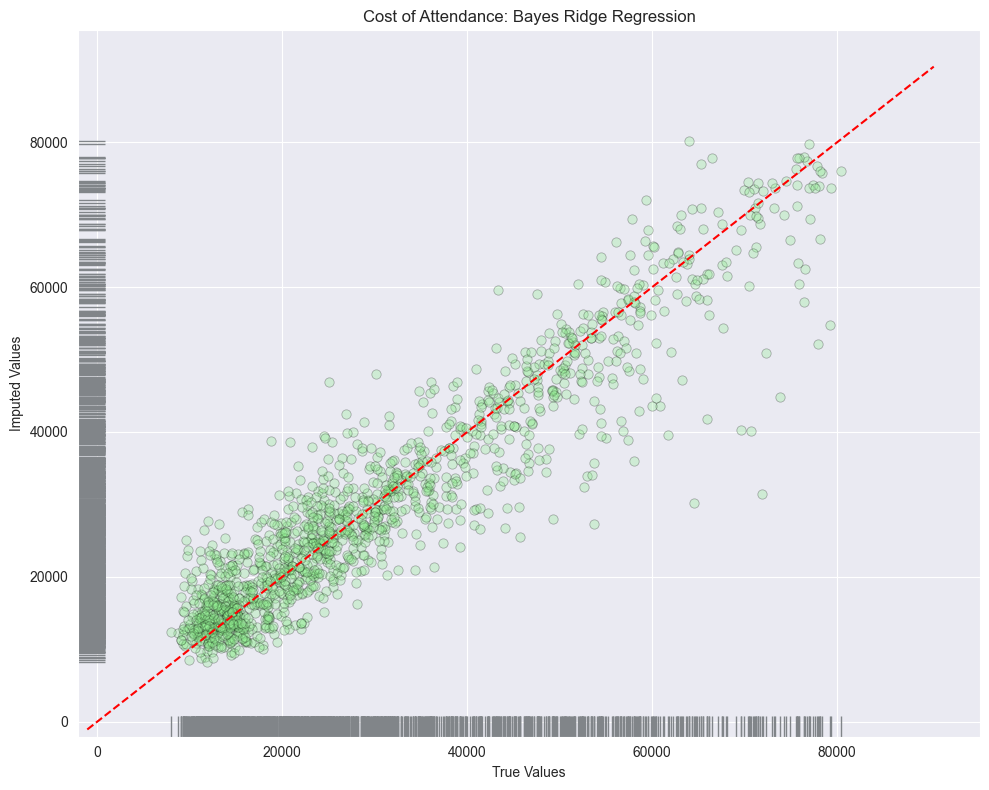

In [22]:
sns.set_style("darkgrid")

col = 'cost_of_attendance'  # Specify the column for Cost of Attendance
mask = residuals_df.query("data_column == @col and impute_technique == 'bayesian_ridge_regression'")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    ax=ax,
    data=mask,
    x="true_value",
    y="predicted_value",
    alpha=0.3,
    s=45,
    edgecolor='black',
    color='#90EE90'
)

# Rug plot on the x-axis (true_value)
sns.rugplot(
    ax=ax,
    x=mask["true_value"],
    y=mask["predicted_value"],
    height=0.03,
    color='#818589'
)

ax.set_title("Cost of Attendance: Bayes Ridge Regression")
ax.set_xlabel("True Values")
ax.set_ylabel("Imputed Values")
ax.set_xlim([mask["true_value"].min()-10000, mask["true_value"].max()+15000])
ax.set_ylim([mask["true_value"].min()-10000, mask["true_value"].max()+15000])

# Line for visual reference
ax.plot(
    [mask["true_value"].min()-9000, mask["true_value"].max()+10000], 
    [mask["true_value"].min()-9000, mask["true_value"].max()+10000], 
    color='red', 
    linestyle='--'
)

plt.tight_layout()
plt.show()

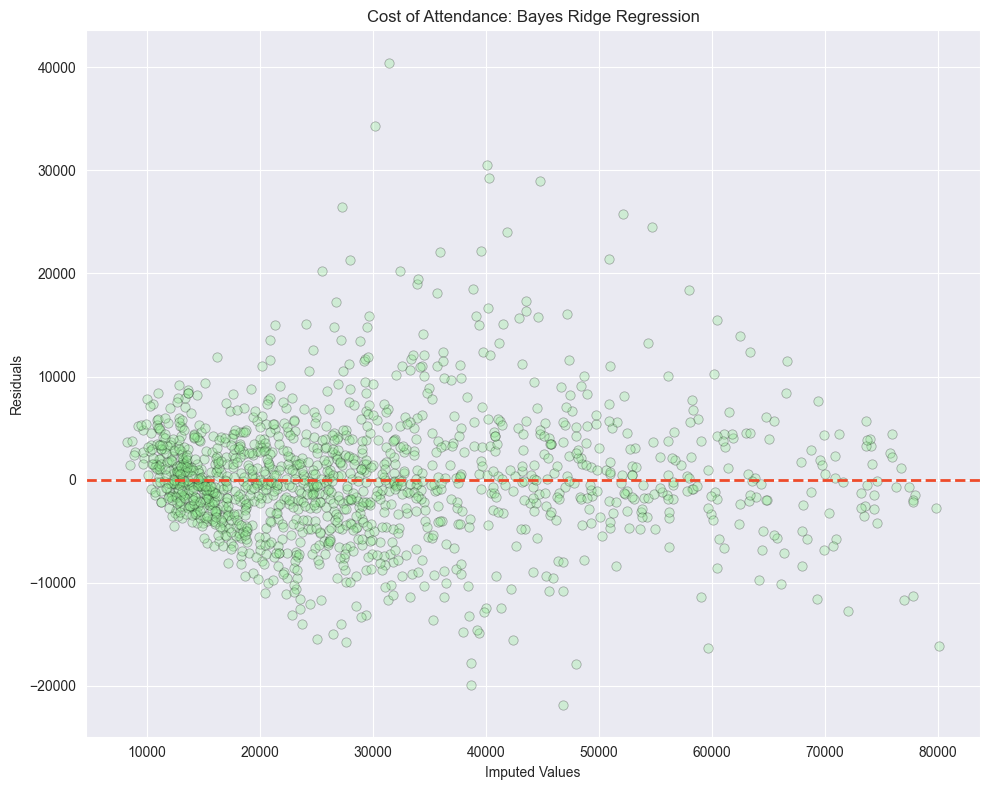

In [25]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

mask = residuals_df.query("data_column == @col and impute_technique == 'bayesian_ridge_regression'")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    ax=ax,
    data=mask,
    x="predicted_value",
    y="residuals",
    alpha=0.3,
    s=45,
    edgecolor='black',
    color='#90EE90'
)

# Horizontal line at y=0 for reference
ax.axhline(y=0, color='#EE4B2B', linestyle='--', linewidth=2)

ax.set_title("Cost of Attendance: Bayes Ridge Regression")
ax.set_xlabel("Imputed Values")
ax.set_ylabel("Residuals")

plt.tight_layout()
plt.show()

## Linear Regression

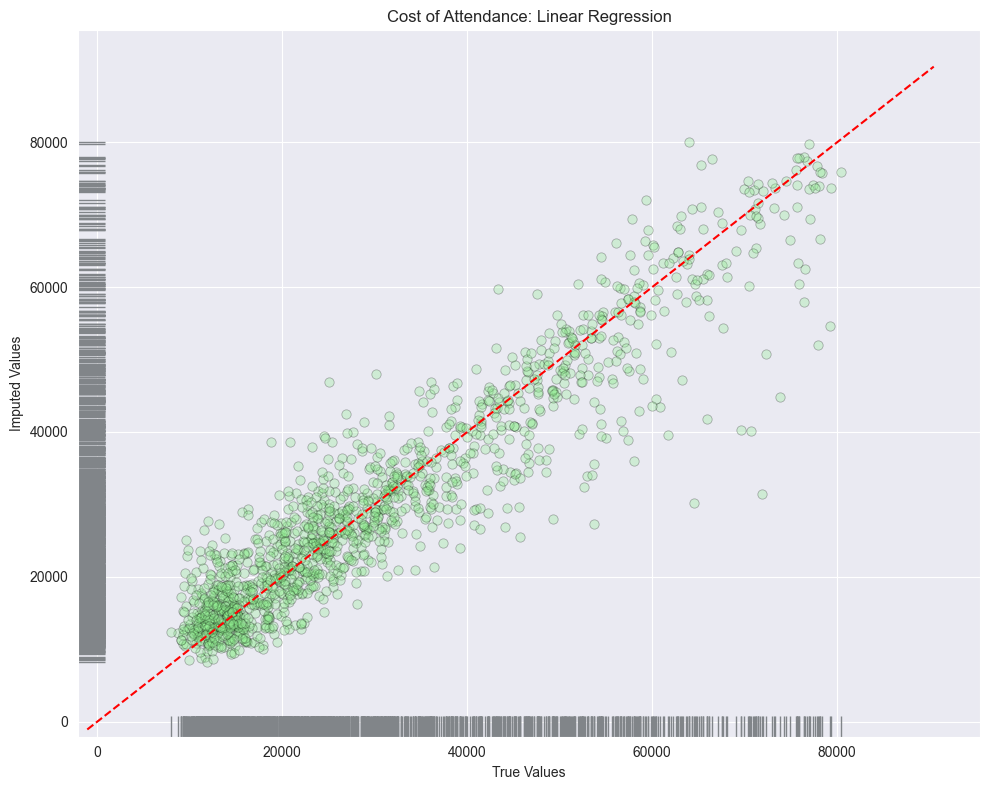

In [27]:
sns.set_style("darkgrid")

col = 'cost_of_attendance'  # Specify the column for Cost of Attendance
mask = residuals_df.query("data_column == @col and impute_technique == 'linear_regression'")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    ax=ax,
    data=mask,
    x="true_value",
    y="predicted_value",
    alpha=0.3,
    s=45,
    edgecolor='black',
    color='#90EE90'
)

# Rug plot on the x-axis (true_value)
sns.rugplot(
    ax=ax,
    x=mask["true_value"],
    y=mask["predicted_value"],
    height=0.03,
    color='#818589'
)

ax.set_title("Cost of Attendance: Linear Regression")
ax.set_xlabel("True Values")
ax.set_ylabel("Imputed Values")
ax.set_xlim([mask["true_value"].min()-10000, mask["true_value"].max()+15000])
ax.set_ylim([mask["true_value"].min()-10000, mask["true_value"].max()+15000])

# Line for visual reference
ax.plot(
    [mask["true_value"].min()-9000, mask["true_value"].max()+10000], 
    [mask["true_value"].min()-9000, mask["true_value"].max()+10000], 
    color='red', 
    linestyle='--'
)

plt.tight_layout()
plt.show()

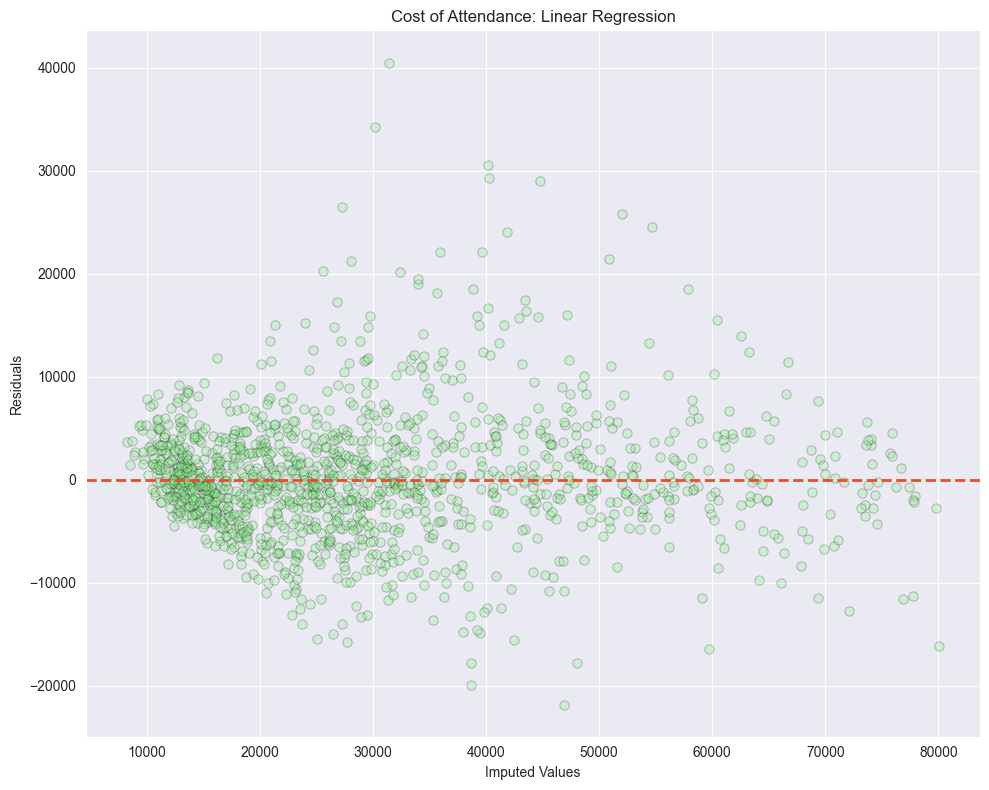

In [28]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

mask = residuals_df.query("data_column == @col and impute_technique == 'linear_regression'")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    ax=ax,
    data=mask,
    x="predicted_value",
    y="residuals",
    alpha=0.3,
    s=45,
    edgecolor='black',
    color='#90EE90'
)

# Horizontal line at y=0 for reference
ax.axhline(y=0, color='#EE4B2B', linestyle='--', linewidth=2)

ax.set_title("Cost of Attendance: Linear Regression")
ax.set_xlabel("Imputed Values")
ax.set_ylabel("Residuals")

plt.tight_layout()
plt.show()

## RandomForestRegression

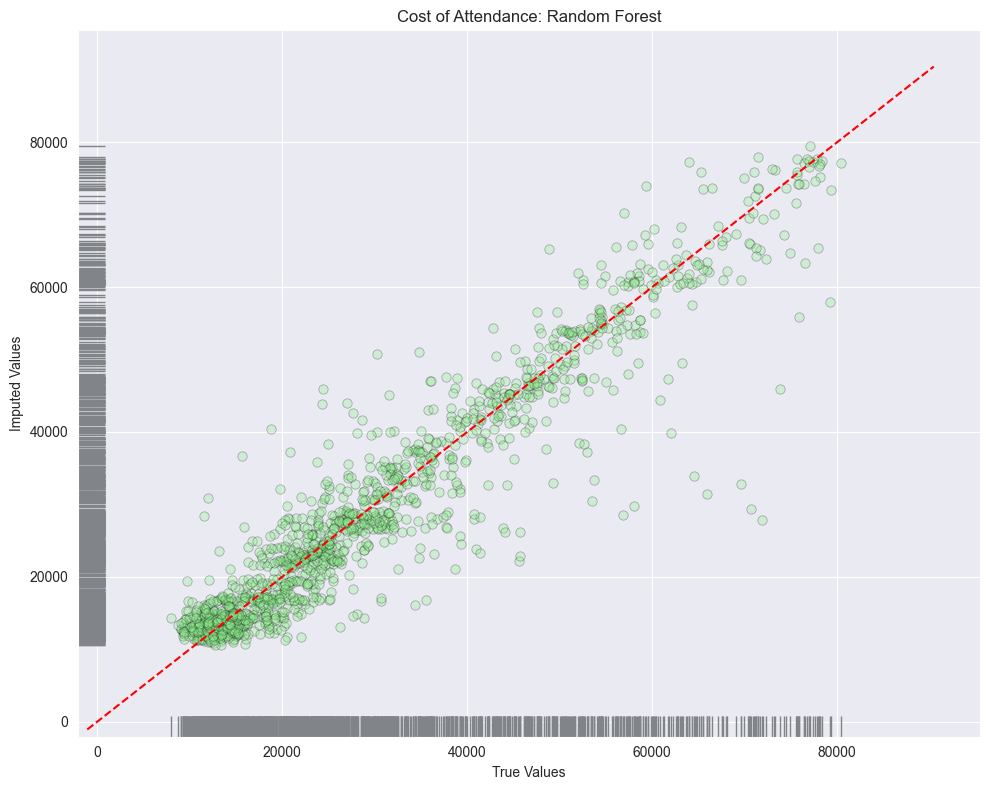

In [30]:
sns.set_style("darkgrid")

col = 'cost_of_attendance'  # Specify the column for Cost of Attendance
mask = residuals_df.query("data_column == @col and impute_technique == 'random_forest'")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    ax=ax,
    data=mask,
    x="true_value",
    y="predicted_value",
    alpha=0.3,
    s=45,
    edgecolor='black',
    color='#90EE90'
)

# Rug plot on the x-axis (true_value)
sns.rugplot(
    ax=ax,
    x=mask["true_value"],
    y=mask["predicted_value"],
    height=0.03,
    color='#818589'
)

ax.set_title("Cost of Attendance: Random Forest")
ax.set_xlabel("True Values")
ax.set_ylabel("Imputed Values")
ax.set_xlim([mask["true_value"].min()-10000, mask["true_value"].max()+15000])
ax.set_ylim([mask["true_value"].min()-10000, mask["true_value"].max()+15000])

# Line for visual reference
ax.plot(
    [mask["true_value"].min()-9000, mask["true_value"].max()+10000], 
    [mask["true_value"].min()-9000, mask["true_value"].max()+10000], 
    color='red', 
    linestyle='--'
)

plt.tight_layout()
plt.show()

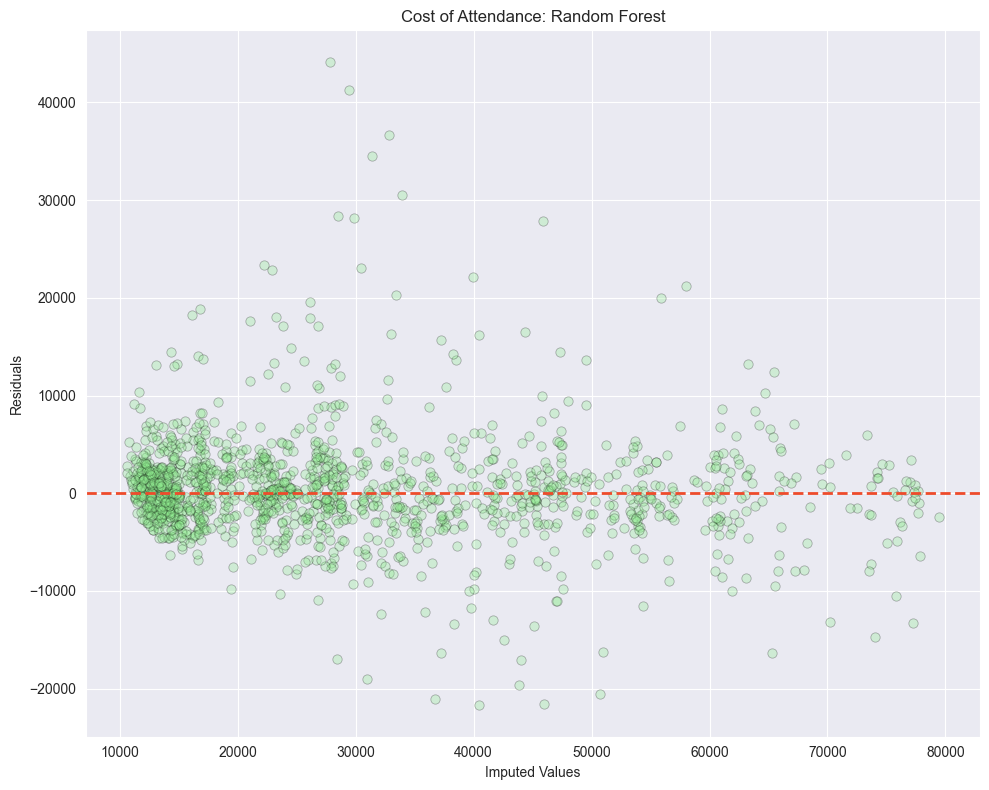

In [31]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

mask = residuals_df.query("data_column == @col and impute_technique == 'random_forest'")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    ax=ax,
    data=mask,
    x="predicted_value",
    y="residuals",
    alpha=0.3,
    s=45,
    edgecolor='black',
    color='#90EE90'
)

# Horizontal line at y=0 for reference
ax.axhline(y=0, color='#EE4B2B', linestyle='--', linewidth=2)

ax.set_title("Cost of Attendance: Random Forest")
ax.set_xlabel("Imputed Values")
ax.set_ylabel("Residuals")

plt.tight_layout()
plt.show()

## KNN Regression

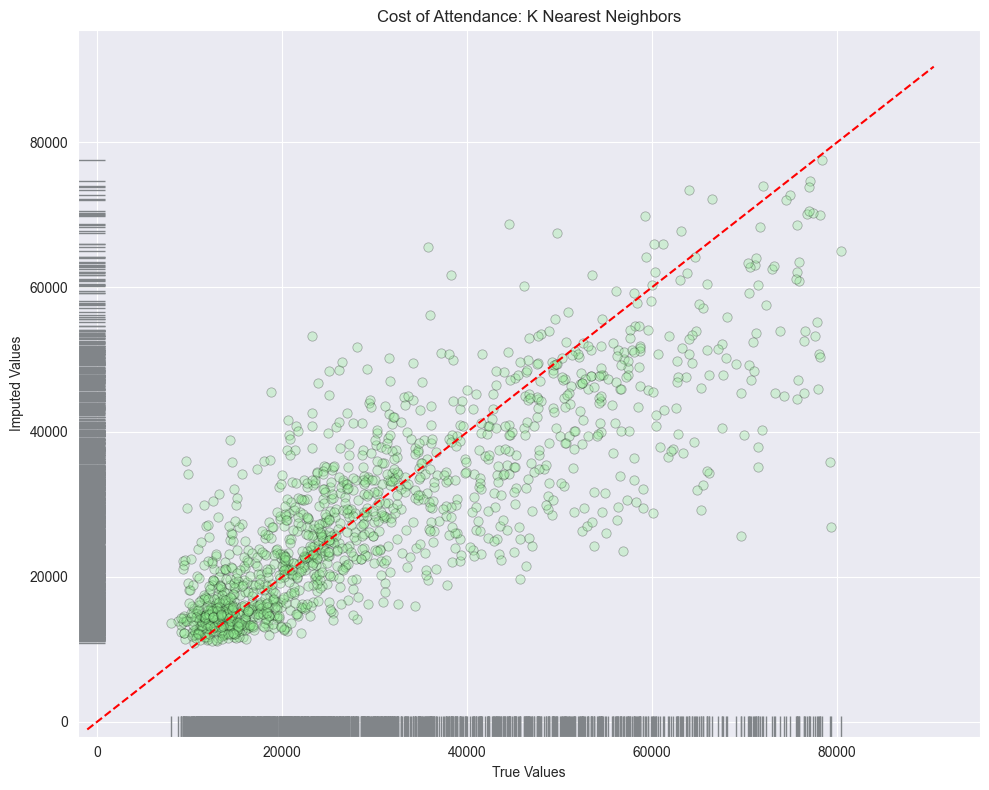

In [32]:
sns.set_style("darkgrid")

col = 'cost_of_attendance'  # Specify the column for Cost of Attendance
mask = residuals_df.query("data_column == @col and impute_technique == 'knn'")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    ax=ax,
    data=mask,
    x="true_value",
    y="predicted_value",
    alpha=0.3,
    s=45,
    edgecolor='black',
    color='#90EE90'
)

# Rug plot on the x-axis (true_value)
sns.rugplot(
    ax=ax,
    x=mask["true_value"],
    y=mask["predicted_value"],
    height=0.03,
    color='#818589'
)

ax.set_title("Cost of Attendance: K Nearest Neighbors")
ax.set_xlabel("True Values")
ax.set_ylabel("Imputed Values")
ax.set_xlim([mask["true_value"].min()-10000, mask["true_value"].max()+15000])
ax.set_ylim([mask["true_value"].min()-10000, mask["true_value"].max()+15000])

# Line for visual reference
ax.plot(
    [mask["true_value"].min()-9000, mask["true_value"].max()+10000], 
    [mask["true_value"].min()-9000, mask["true_value"].max()+10000], 
    color='red', 
    linestyle='--'
)

plt.tight_layout()
plt.show()

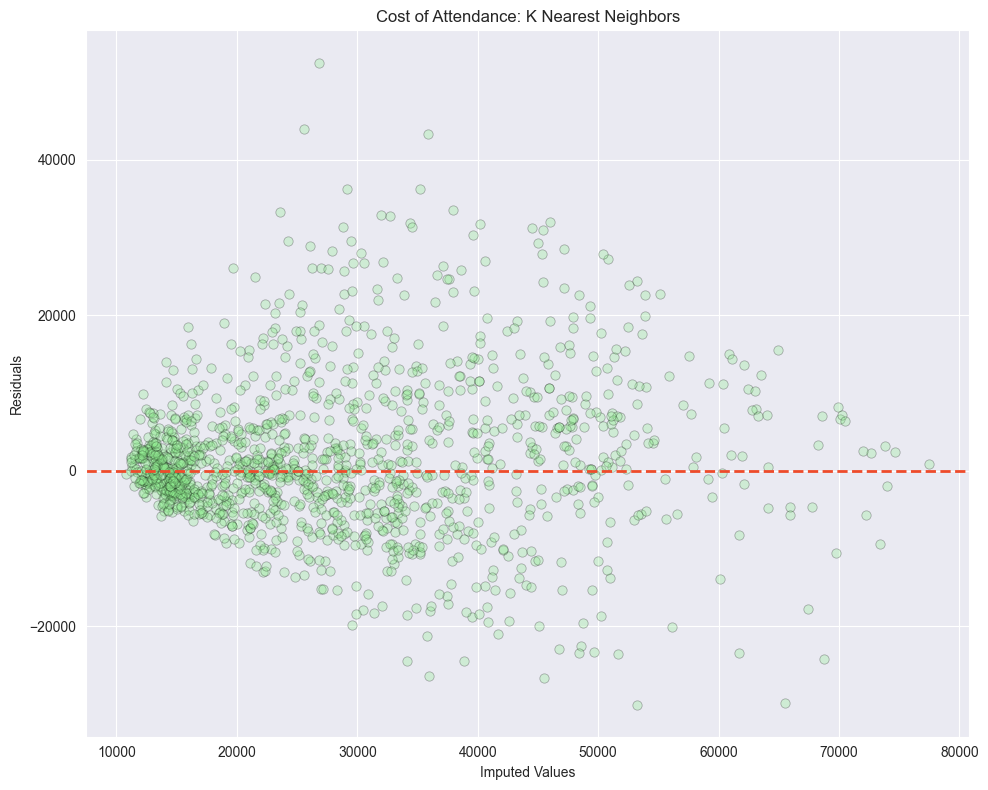

In [33]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

mask = residuals_df.query("data_column == @col and impute_technique == 'knn'")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    ax=ax,
    data=mask,
    x="predicted_value",
    y="residuals",
    alpha=0.3,
    s=45,
    edgecolor='black',
    color='#90EE90'
)

# Horizontal line at y=0 for reference
ax.axhline(y=0, color='#EE4B2B', linestyle='--', linewidth=2)

ax.set_title("Cost of Attendance: K Nearest Neighbors")
ax.set_xlabel("Imputed Values")
ax.set_ylabel("Residuals")

plt.tight_layout()
plt.show()

In [45]:
error_metrics = ["mae", "mse", "rmse"]

dfs = []
for imputer, errors in error_dicts.items():
    for col, metrics in errors.items():
        temp_df = pd.DataFrame([metrics], columns=error_metrics)
        temp_df['column'] = col
        temp_df['imputer'] = imputer
        dfs.append(temp_df)

# Concatenating all the DataFrames
error_df = pd.concat(dfs).reset_index(drop=True)
error_df = round(error_df, 2)

In [46]:
error_df.head()

,mae,mse,rmse,column,imputer
0,4292.50,37296221.96,6107.06,cost_of_attendance,bayesian_ridge_regression
1,3994.80,33677266.57,5803.21,in_state_tuition,bayesian_ridge_regression
2,4294.89,36794126.15,6065.82,out_of_state_tuition,bayesian_ridge_regression
3,3437.23,23290659.74,4826.04,tuition_per_fte,bayesian_ridge_regression
4,3786.36,35374472.18,5947.64,instructional_expenditure_per_fte,bayesian_ridge_regression


In [44]:
# reshaping the DataFrame to have columns as rows for easier grouping
long_format_df = pd.melt(error_df, id_vars=['column', 'imputer'], 
                         value_vars=['mae', 'mse', 'rmse'], 
                         var_name='metric', value_name='value')


# sort the DataFrame by value within each group and then reset the index
sorted_df = long_format_df.sort_values(by=['metric', 'column', 'value']).reset_index(drop=True)

# group by metric and column, then take the first two (best and runner-up) imputers for each group
top_imputers = sorted_df.groupby(['metric', 'column']).head(2)

# filter for 'cost_of_attendance' metric
top_imputers_cost_of_attendance = top_imputers[top_imputers['column'] == 'cost_of_attendance']

# display the results for 'cost_of_attendance'
for (metric, column), group in top_imputers_cost_of_attendance.groupby(['metric', 'column']):
    best = group.iloc[0]
    runner_up = group.iloc[1]
    
    print(f"For column '{column}' and metric '{metric}':")
    print(f"  - Best imputer is '{best['imputer']}' with a value of {best['value']}")
    print(f"  - Runner-up imputer is '{runner_up['imputer']}' with a value of {runner_up['value']}\n")

For column 'cost_of_attendance' and metric 'mae':
  - Best imputer is 'random_forest' with a value of 3481.87
  - Runner-up imputer is 'bayesian_ridge_regression' with a value of 4292.5

For column 'cost_of_attendance' and metric 'mse':
  - Best imputer is 'random_forest' with a value of 30602315.13
  - Runner-up imputer is 'bayesian_ridge_regression' with a value of 37296221.96

For column 'cost_of_attendance' and metric 'rmse':
  - Best imputer is 'random_forest' with a value of 5531.94
  - Runner-up imputer is 'bayesian_ridge_regression' with a value of 6107.06



/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_68366/372713615.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


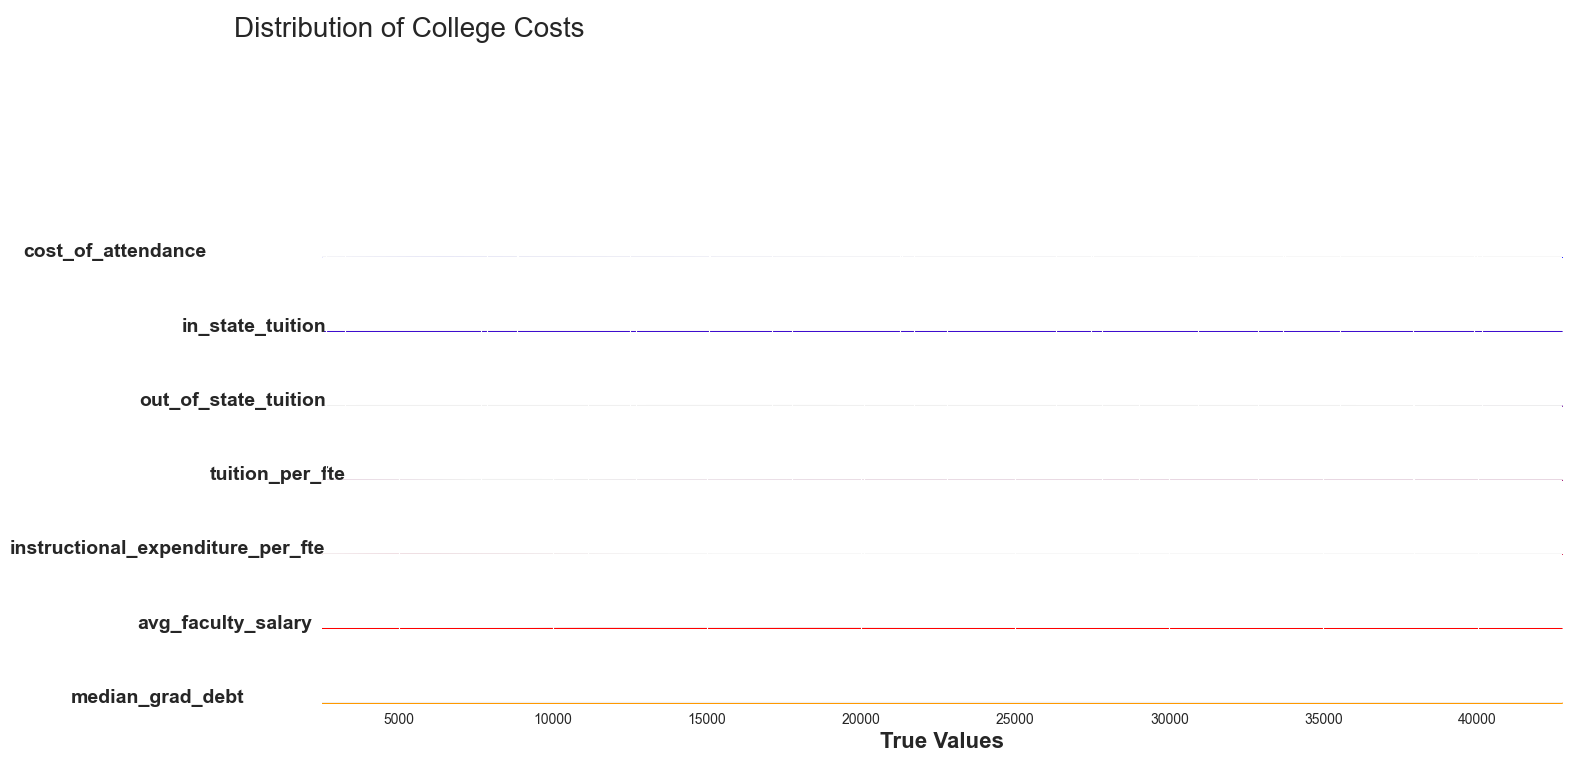

In [42]:
data_columns = residuals_df['data_column'].unique()
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000', '#ff9900']

gs = grid_spec.GridSpec(len(data_columns), 1)
fig = plt.figure(figsize=(16, 9))

ax_objs = []
for i, column in enumerate(data_columns):
    x = np.array(residuals_df[residuals_df['data_column'] == column]['true_value'])
    
    # Adjust x_d to cover the range of your data
    x_d_min, x_d_max = x.min() - 1000, x.max() + 1000
    x_d = np.linspace(x_d_min, x_d_max, 1000)

    # Adjust the bandwidth here
    bandwidth = max((x_d_max - x_d_min) / 20, 0.1)  # Example adjustment
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    ax = fig.add_subplot(gs[i, 0])
    ax_objs.append(ax)

    ax.plot(x_d, np.exp(logprob), color="#f0f0f0", lw=1)
    ax.fill_between(x_d, np.exp(logprob), alpha=1, color=colors[i])

    ax.set_xlim(x_d_min, x_d_max)
    ax.set_ylim(0, np.exp(logprob).max() + 0.05)

    ax.patch.set_alpha(0)
    ax.set_yticklabels([])

    if i == len(data_columns) - 1:
        ax.set_xlabel("True Values", fontsize=16, fontweight="bold")
    else:
        ax.set_xticklabels([])

    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

    adj_column = column.replace(" ", "\n")
    ax.text(-0.02, 0, adj_column, fontweight="bold", fontsize=14, ha="right")

gs.update(hspace=-0.7)
fig.text(0.07, 0.85, "Distribution of College Costs", fontsize=20)

plt.tight_layout()
plt.show()

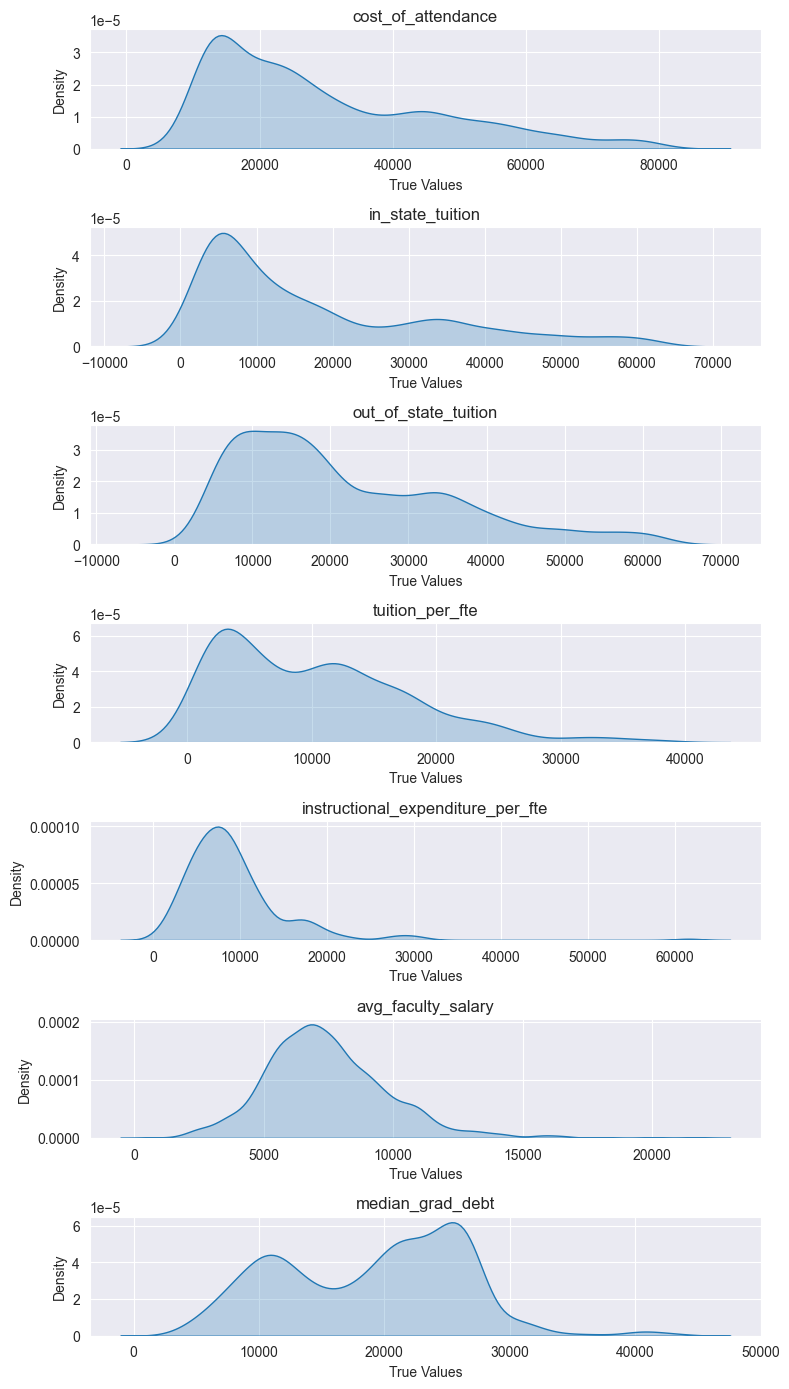

In [59]:
# Determine the number of rows and columns based on the length of columns_to_impute
num_rows = len(columns_to_impute)
num_cols = 1  # You can adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows))

for i, col in enumerate(columns_to_impute):
    mask = residuals_df.query("data_column == @col")

    # Select the current axis
    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes  # If only one row, use a single axis

    # Plotting the KDE plot on the selected axis
    sns.kdeplot(data=mask, x="true_value", fill=True, label=col, ax=ax)

    ax.set_title(col)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [60]:
test_df.median_grad_debt = pd.to_numeric(test_df.median_grad_debt)

In [61]:
columns_to_impute

Index(['cost_of_attendance', 'in_state_tuition', 'out_of_state_tuition',
       'tuition_per_fte', 'instructional_expenditure_per_fte',
       'avg_faculty_salary', 'median_grad_debt'],
      dtype='object')

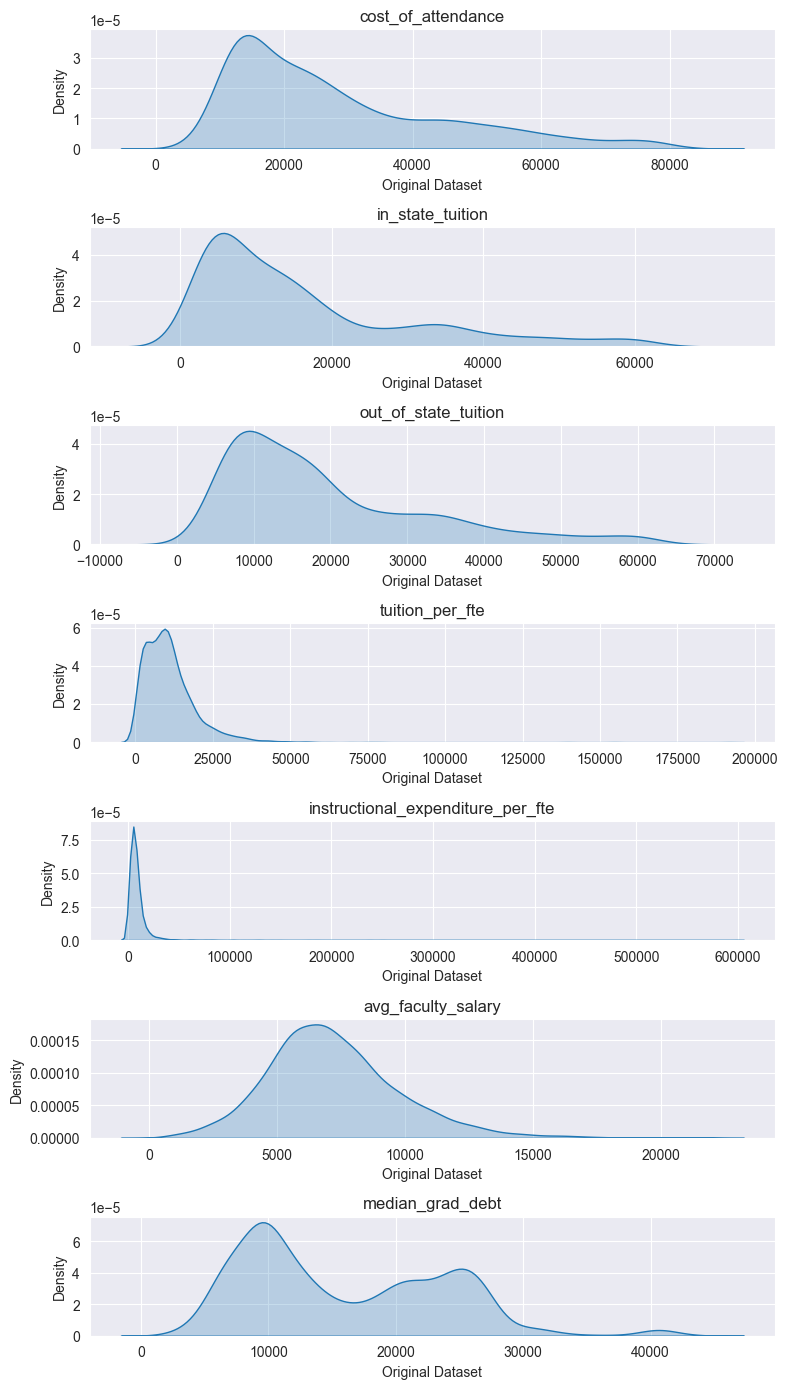

In [62]:
# Determine the number of rows and columns based on the length of columns_to_impute
num_rows = len(columns_to_impute)
num_cols = 1  # You can adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows))

for i, col in enumerate(columns_to_impute):
    # mask = test_df.query("data_column == @col")

    # Select the current axis
    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes  # If only one row, use a single axis

    # Plotting the KDE plot on the selected axis
    sns.kdeplot(data=test_df, x=f"{col}", fill=True, label=col, ax=ax)

    ax.set_title(col)
    ax.set_xlabel('Original Dataset')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [63]:
test_df_clean.dtypes

cost_of_attendance                   float64
in_state_tuition                     float64
out_of_state_tuition                 float64
tuition_per_fte                      float64
instructional_expenditure_per_fte    float64
avg_faculty_salary                   float64
median_grad_debt                      object
dtype: object